In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load the Titanic dataset
data = pd.read_csv('/content/titanic-dataset.csv')

# Display the first few rows of the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Preprocess the data
# Drop columns that are not needed for the model
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [4]:
# Fill missing values for 'Age' with the median value and 'Embarked' with the most frequent value
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [5]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [6]:
# Convert categorical variables to numeric using Label Encoding
label_encoders = {}
for column in ['Sex', 'Embarked']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [7]:
# Split the dataset into features (X) and target (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize and train the Decision Tree classifier
decision_tree = DecisionTreeClassifier(max_depth=7, min_samples_split=10, min_samples_leaf=5, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [10]:
# Make predictions with the Decision Tree in train
y_pred_train = decision_tree.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))

Train Accuracy: 0.8707865168539326


In [11]:
# Make predictions with the Decision Tree
y_pred_tree = decision_tree.predict(X_test)

# Evaluate the Decision Tree classifier
print("Decision Tree Classifier:")
print("Test Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

Decision Tree Classifier:
Test Accuracy: 0.8547486033519553
Confusion Matrix:
 [[97  8]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       105
           1       0.88      0.76      0.81        74

    accuracy                           0.85       179
   macro avg       0.86      0.84      0.85       179
weighted avg       0.86      0.85      0.85       179



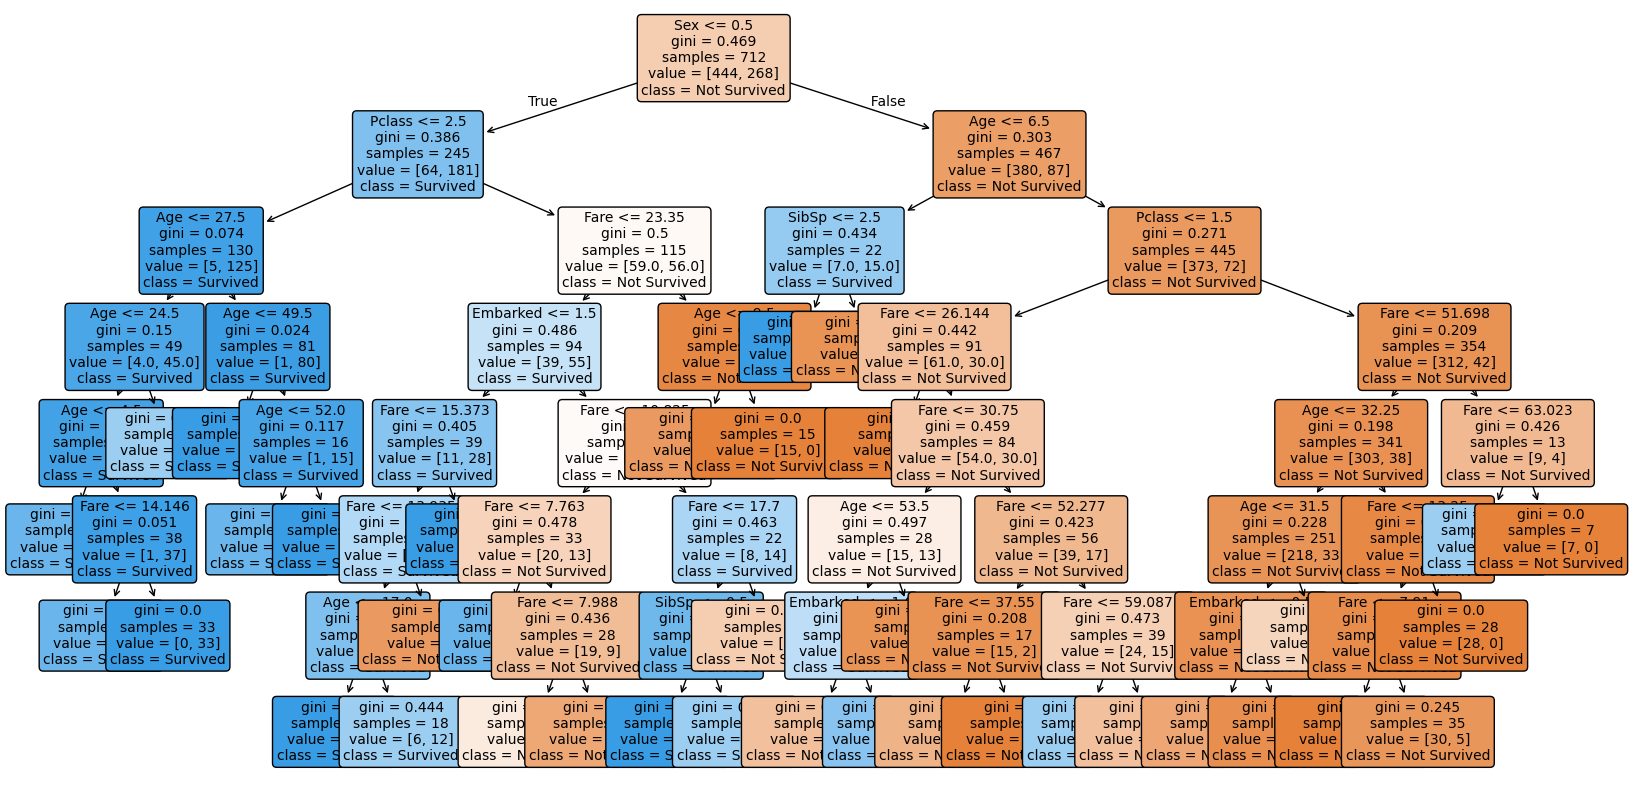

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set figure size
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(decision_tree, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True, fontsize=10)

# Show the plot
plt.show()